📝 Project: 
Regression on Delivery Time Prediction In this project, we analyze a real-world dataset containing attributes related to food delivery logistics. The dataset includes variables such as the delivery person's age and rating, geographic coordinates of the restaurant and delivery location, and order details. Our goal is to build a complete machine learning pipeline—from data preprocessing and visualization to model development and evaluation—to predict the delivery time in minutes.

🎯 Objective:

The objective is to develop and compare regression models that accurately predict the delivery time for an order based on various human, geographic, and service-related factors. This helps food delivery platforms optimize route planning, improve customer satisfaction, and reduce operational delays.

🤖 Models Evaluated:

- Linear Regression

- Polynomial Regression

- Support Vector Regression (SVR)

📊 Evaluation Metrics To assess and compare model performance, the following regression metrics are used:

- MAE (Mean Absolute Error)

- MSE (Mean Squared Error)

- RMSE (Root Mean Squared Error)

These metrics measure how accurately and consistently the models predict actual delivery times.

By training and evaluating multiple models, we aim to:

Identify the best-performing regression model for delivery time estimation

Understand how factors like distance, delivery person’s experience, and order type influence delivery duration

Provide actionable insights to optimize delivery operations and enhance the overall user experience.

In [1]:
pip install pandas 

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import  seaborn as sns

In [4]:
data=pd.read_csv("C:/Users/SUSHMITHA/Downloads/sudents and projects/sudents and projects/S6/Reression/Delivery-time/Delivery time/deliverytime.txt")
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [5]:
data.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26
45592,5FB2,RANCHIRES09DEL02,23,4.9,23.351058,85.325731,23.431058,85.405731,Snack,scooter,36


In [6]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [7]:
data.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [9]:
data.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [10]:
data.isnull()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
45588,False,False,False,False,False,False,False,False,False,False,False
45589,False,False,False,False,False,False,False,False,False,False,False
45590,False,False,False,False,False,False,False,False,False,False,False
45591,False,False,False,False,False,False,False,False,False,False,False


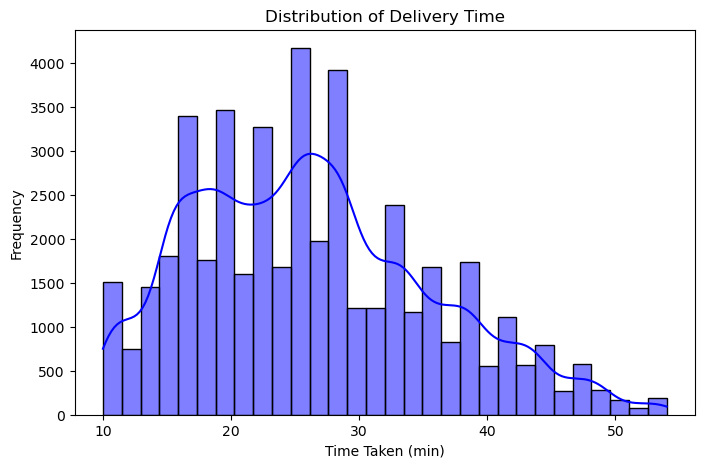

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(data['Time_taken(min)'],bins =30,kde=True,color='blue')
plt.title('Distribution of Delivery Time')
plt.xlabel('Time Taken (min)')
plt.ylabel('Frequency')
plt.show()

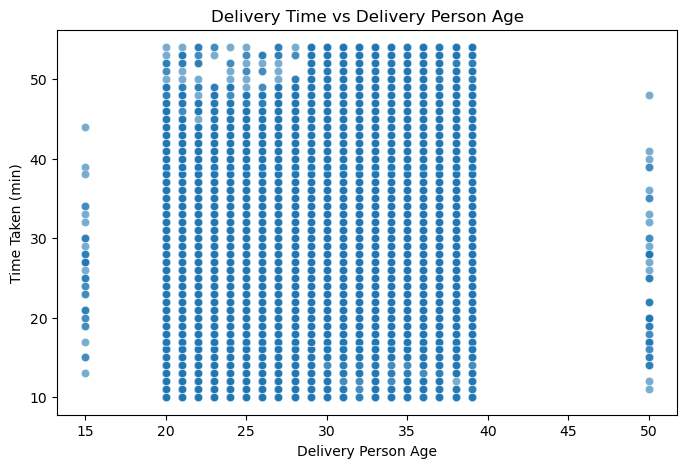

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Delivery_person_Age', y='Time_taken(min)', data=data, alpha=0.6)
plt.title('Delivery Time vs Delivery Person Age')
plt.xlabel('Delivery Person Age')
plt.ylabel('Time Taken (min)')
plt.show()

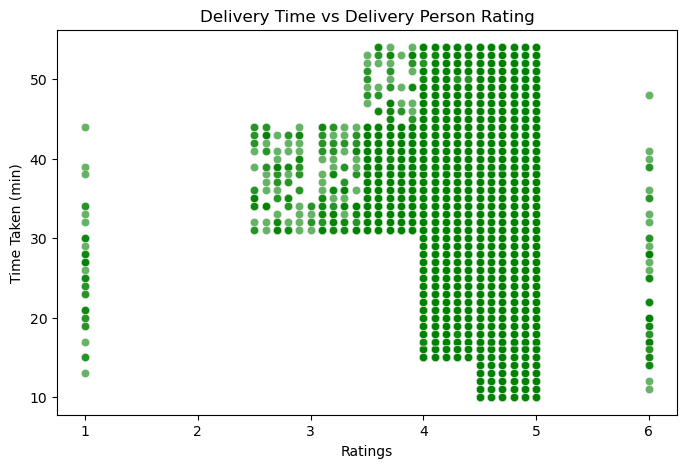

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Delivery_person_Ratings', y='Time_taken(min)', data=data, color='green', alpha=0.6)
plt.title('Delivery Time vs Delivery Person Rating')
plt.xlabel('Ratings')
plt.ylabel('Time Taken (min)')
plt.show()

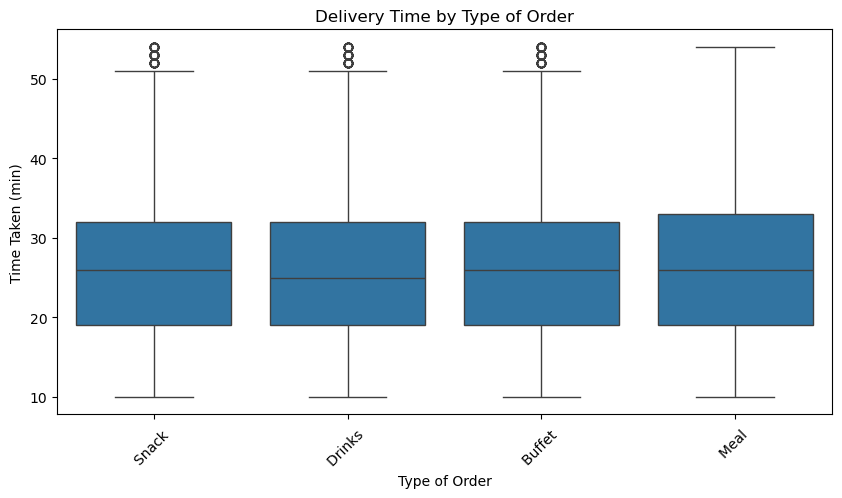

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Type_of_order', y='Time_taken(min)', data=data)
plt.title('Delivery Time by Type of Order')
plt.xlabel('Type of Order')
plt.ylabel('Time Taken (min)')
plt.xticks(rotation=45)
plt.show()

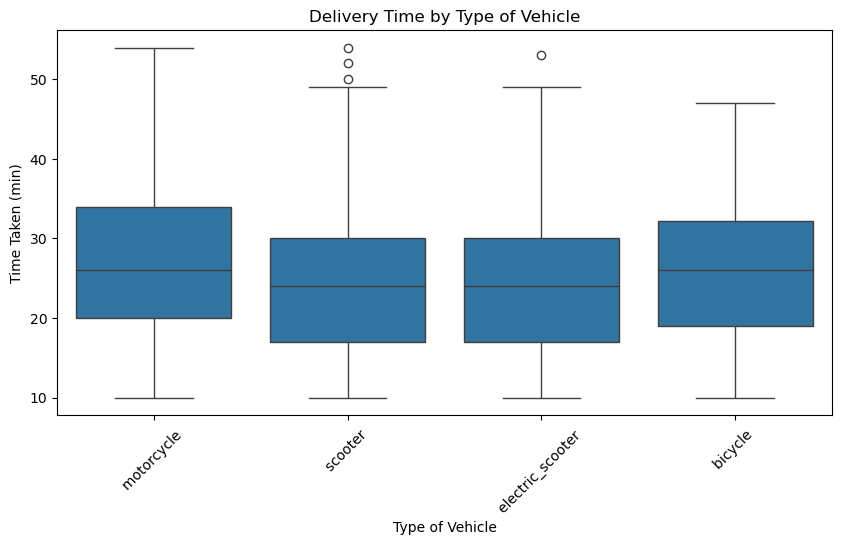

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Type_of_vehicle', y='Time_taken(min)', data=data)
plt.title('Delivery Time by Type of Vehicle')
plt.xlabel('Type of Vehicle')
plt.ylabel('Time Taken (min)')
plt.xticks(rotation=45)
plt.show()

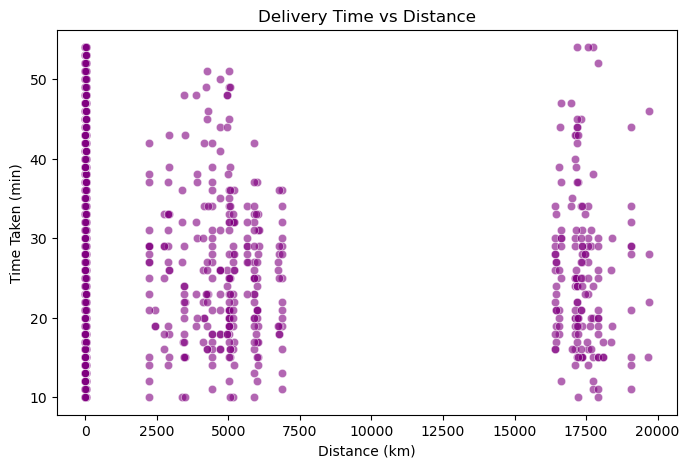

In [16]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    # Radius of Earth in km
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2*np.arcsin(np.sqrt(a))
    return R * c

data['distance_km'] = haversine(
    data['Restaurant_latitude'],
    data['Restaurant_longitude'],
    data['Delivery_location_latitude'],
    data['Delivery_location_longitude']
)

# Plot: Distance vs Time
plt.figure(figsize=(8,5))
sns.scatterplot(x='distance_km', y='Time_taken(min)', data=data, alpha=0.6, color='purple')
plt.title('Delivery Time vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Time Taken (min)')
plt.show()


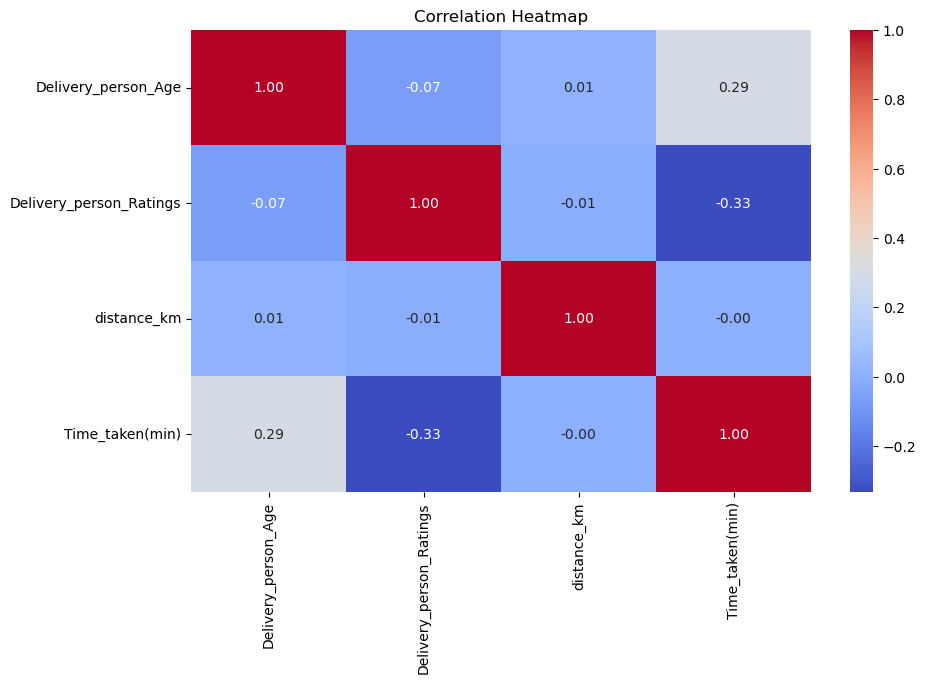

In [17]:
plt.figure(figsize=(10,6))
num_cols = ['Delivery_person_Age', 'Delivery_person_Ratings', 'distance_km', 'Time_taken(min)']
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [18]:
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance_km
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32,1.489846
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36,11.007735
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16,4.657195
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26,6.232393


In [19]:
data = data.drop(columns=['ID','Delivery_person_ID'],axis = 1)

In [20]:
data

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance_km
0,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138
...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32,1.489846
45589,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36,11.007735
45590,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16,4.657195
45591,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26,6.232393


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Type_of_order'] = le.fit_transform(data['Type_of_order'])
data['Type_of_vehicle'] = le.fit_transform(data['Type_of_vehicle'])


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45593 non-null  int64  
 1   Delivery_person_Ratings      45593 non-null  float64
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Type_of_order                45593 non-null  int32  
 7   Type_of_vehicle              45593 non-null  int32  
 8   Time_taken(min)              45593 non-null  int64  
 9   distance_km                  45593 non-null  float64
dtypes: float64(6), int32(2), int64(2)
memory usage: 3.1 MB


In [23]:
X = data.drop("Time_taken(min)", axis=1)
y = data["Time_taken(min)"]

In [24]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)



In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<h1>Multilinear Regression</h1>

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_lr)
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = np.sqrt(MSE)

print("🔹 Multiple Linear Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

r2 = r2_score(y_test, y_pred_lr)
print("🔹 R² Score (Accuracy for Regression):", r2)


🔹 Multiple Linear Regression
MAE: 6.636517748880759
MSE: 71.6316148420058
RMSE: 8.46354623322906
🔹 R² Score (Accuracy for Regression): 0.1830162282807989


<h1>Polynomial Regression</h1>

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

MAE = mean_absolute_error(y_test, y_pred_poly)
MSE = mean_squared_error(y_test, y_pred_poly)
RMSE = np.sqrt(MSE)

print("\n🔸 Polynomial Regression (Degree=2)")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)


🔸 Polynomial Regression (Degree=2)
MAE: 6.268285313676204
MSE: 62.19807550151881
RMSE: 7.886575651163109


<h1>SVR</h1>

In [31]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_svr)
MSE = mean_squared_error(y_test, y_pred_svr)
RMSE = np.sqrt(MSE)

print("\n🔹 Support Vector Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

r2 = r2_score(y_test, y_pred_svr)
print("🔹 R² Score (Accuracy for Regression):", r2)                       


🔹 Support Vector Regression
MAE: 6.286083633261101
MSE: 66.47092585934438
RMSE: 8.15297037032175
🔹 R² Score (Accuracy for Regression): 0.24187570197860553
